In [1]:
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath("../Instruments"))
import numpy as np
from ETF import ETF
from Future import Future
from Treasury import Treasury
from Portfolio import Portfolio
from risk_free_rate import get_risk_free_rate
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Long Only Portfolio With ETFs and Futures

In [2]:
SPY = ETF("SPY")
XLB = ETF("XLB")
XLF = ETF("XLF")
XLP = ETF("XLP")
XLY = ETF("XLY")
XLE = ETF("XLE")
XLI = ETF("XLI")
XLK = ETF("XLK")
XLU = ETF("XLU")
XLV = ETF("XLV")

ES1 = Future("ES1")
DX1 = Future("DX1")
SI1 = Future("SI1")
CL1 = Future("CL1")
NG1 = Future("NG1")
GC1 = Future("GC1")
DBC = ETF("DBC")

all_etfs_futures = [XLB, XLF, XLP, XLY, XLE, XLI, XLK, XLU, XLV, ES1, DX1, SI1, CL1, NG1, GC1]


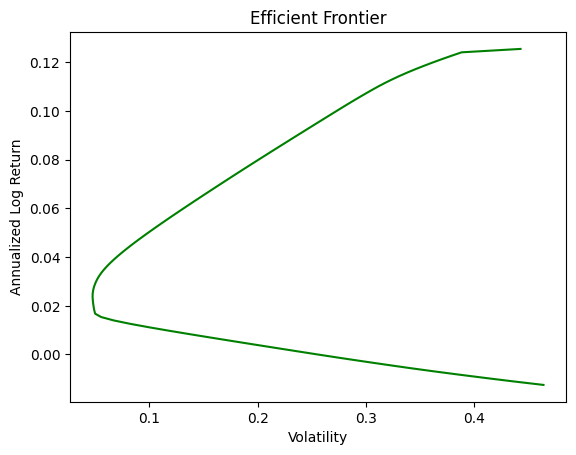

In [3]:
portfolio = Portfolio(all_etfs_futures, rf = get_risk_free_rate('2008-05-06'), equity_benchmark = SPY, future_benchmark = DBC)
portfolio.filter(startDate="2008-01-01", endDate="2024-01-01", period=1)
max_sharpe_ratio, ret, vol, weights = portfolio.max_sharpe_portfolio(n_points=100, min_weight=0, max_weight=1.0)
portfolio.plot_ef(n_points = 100, min_weight=0, max_weight=1.0)


In [4]:
print("MSR portfolio weights: " + str(weights))
print("MSR portfolio expected annualized log return: " + str(ret))
print("MSR portfolio annualized volatility of log returns: " + str(vol))
print("Sharpe Ratio of Portfolio: "+str(max_sharpe_ratio))
print("MSR portfolio VaR: "+str(portfolio.portfolio_VaR(weights)))
print("MSR portfolio ES: "+str(portfolio.portfolio_ES(weights)))
print()

MSR portfolio weights: [7.12953333e-02 5.60112394e-05 7.65187649e-03 2.74987658e-02
 3.24016643e-02 2.98868802e-02 1.07146059e-01 2.81905449e-02
 7.67232225e-02 2.05579978e-16 5.23049014e-01 2.65464361e-17
 6.03510975e-17 0.00000000e+00 9.61006273e-02]
MSR portfolio expected annualized log return: 0.04745373979956066
MSR portfolio annualized volatility of log returns: 0.09103688341802414
Sharpe Ratio of Portfolio: 0.3296117471207169
MSR portfolio VaR: 0.14974234787649535
MSR portfolio ES: 0.18778294538191878



In [5]:
# Filters data to only 2024 election cycle
portfolio.filter(startDate="2024-01-01", endDate="2025-01-01", period=1)
portfolio.set_rf(get_risk_free_rate('2024-05-07'))
# See how the calculated weights using data up to and including 2020 election would have worked
# for the 2024 election
print("2024 election period actual annualized log returns: " + str(portfolio.historical_annualized_log_return(weights)))

# Filters data to May 5 to November 17 of 2023 (6.5 month period of a non-election year)
portfolio.filter(startDate="2023-05-05", endDate="2023-11-17", period=-1)
portfolio.set_rf(get_risk_free_rate('2023-05-05'))
print("2023 May 5 to November 17 actual annualized log returns: " +  str(portfolio.historical_annualized_log_return(weights)))

# Filters data to May 6 to November 18 of 2022 (6.5 month period of a non-election year)
portfolio.filter(startDate="2022-05-06", endDate="2022-11-18", period=-1)
portfolio.set_rf(get_risk_free_rate('2022-05-06'))
print("2022 May 6 to November 18 actual annualized log returns: " +  str(portfolio.historical_annualized_log_return(weights)))

# Filters data to May 7 to November 19 of 2021 (6.5 month period of a non-election year)
portfolio.filter(startDate="2021-05-07", endDate="2021-11-19", period=-1)
portfolio.set_rf(get_risk_free_rate('2021-05-07'))
print("2021 May 7 to November 19 actual annualized log returns: " +  str(portfolio.historical_annualized_log_return(weights)))

2024 election period actual annualized log returns: 0.08974472086440655
2023 May 5 to November 17 actual annualized log returns: 0.07514280786072325
2022 May 6 to November 18 actual annualized log returns: 0.0049498504749427
2021 May 7 to November 19 actual annualized log returns: 0.12980174444283257
